In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import random

In [2]:
data = pd.read_csv("/kaggle/input/fashion-mnsit/fashion-mnist_train.csv")

In [3]:
print(data)

       label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0          2       0       0       0       0       0       0       0       0   
1          9       0       0       0       0       0       0       0       0   
2          6       0       0       0       0       0       0       0       5   
3          0       0       0       0       1       2       0       0       0   
4          3       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
59995      9       0       0       0       0       0       0       0       0   
59996      1       0       0       0       0       0       0       0       0   
59997      8       0       0       0       0       0       0       0       0   
59998      8       0       0       0       0       0       0       0       0   
59999      7       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel775  pixel776 

In [4]:
import pandas as pd

# Load the dataset
train_df = pd.read_csv('/kaggle/input/fashion-mnsit/fashion-mnist_train.csv')

# Check if there are any NaN or empty values in the entire DataFrame
nan_exists = train_df.isna().any().any()
empty_exists = (train_df == '').any().any()

print(f"Does NaN exist in any row? {'Yes' if nan_exists else 'No'}")
print(f"Does any row contain empty strings? {'Yes' if empty_exists else 'No'}")

# If there are NaN or empty values, show a summary of columns with missing values
if nan_exists or empty_exists:
    print("\nColumns with missing or empty values:")
    print(train_df.isna().sum()[train_df.isna().sum() > 0])  # Summing NaNs per column
    print(train_df.eq('').sum()[train_df.eq('').sum() > 0])  # Summing empty strings per column

# Optional: Display rows with any NaN or empty values for further inspection
rows_with_missing = train_df[train_df.isna().any(axis=1) | (train_df == '').any(axis=1)]
if not rows_with_missing.empty:
    print("\nRows with NaN or empty values:")
    print(rows_with_missing)


Does NaN exist in any row? No
Does any row contain empty strings? No


**PART A**
Perform appropriate preprocessing on the data (for eg: normalization)
and visualize any 10 samples from the test dataset.

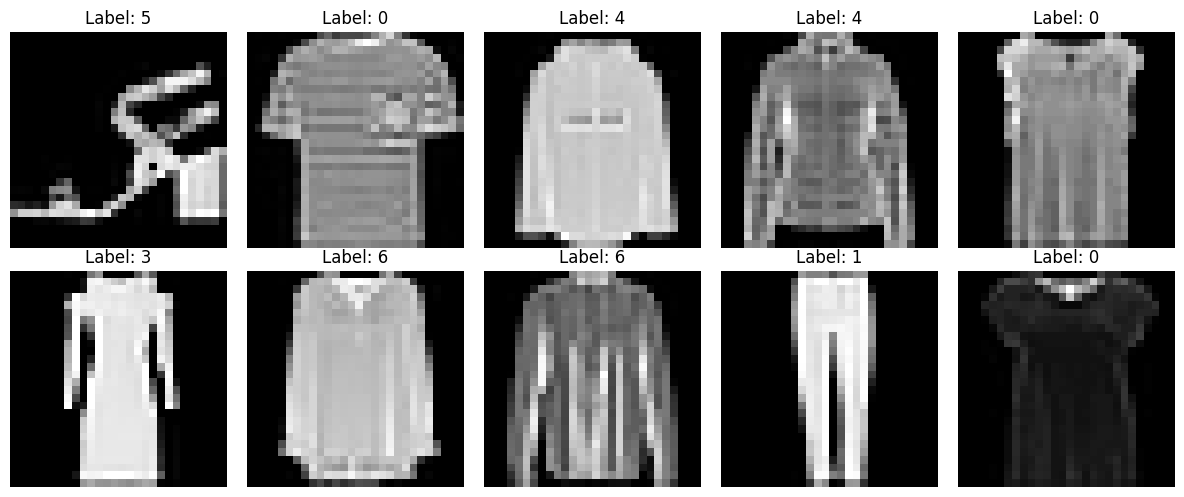

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
train_df = pd.read_csv('/kaggle/input/fashion-mnsit/fashion-mnist_train.csv')

# Separate features and labels
X = train_df.drop('label', axis=1)  # Pixel data
y = train_df['label']               # Labels

# Normalize pixel values (0-255 to 0-1)
X = X / 255.0

# Function to visualize 10 random samples
def visualize_samples(X, y, num_samples=10, img_size=(28, 28)):
    """
    Visualize a number of randomly selected samples from the dataset.
    Each sample is reshaped to `img_size`.
    """
    # Select random indices
    sample_indices = np.random.choice(X.index, num_samples, replace=False)
    sample_images = X.iloc[sample_indices].values  # Get the pixel values
    sample_labels = y.iloc[sample_indices].values  # Get the corresponding labels
    
    # Plotting
    fig, axes = plt.subplots(2, 5, figsize=(12, 5))
    axes = axes.flatten()
    
    for i, (img, label) in enumerate(zip(sample_images, sample_labels)):
        # Reshape the flattened image into 28x28
        img = img.reshape(img_size)
        
        # Display the image
        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(f"Label: {label}")
        axes[i].axis("off")  # Hide the axis for clarity
    
    plt.tight_layout()
    plt.show()

# Visualize 10 samples from the dataset
visualize_samples(X, y, num_samples=10, img_size=(28, 28))


In [6]:
"""import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
train_df = pd.read_csv('/kaggle/input/fashion-mnsit/fashion-mnist_train.csv')
test_df = pd.read_csv('/kaggle/input/fashion-mnsit/fashion-mnist_test.csv')

# Separate features and labels
X_train = train_df.drop('label', axis=1)
y_train = train_df['label']
X_test = test_df.drop('label', axis=1)
y_test = test_df['label']

# Split training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Initialize dictionary to store results
results = {}
activation_functions = ['logistic', 'tanh', 'relu', 'identity']

# Create figure for plotting
plt.figure(figsize=(15, 10))

# Train models with different activation functions
for i, activation in enumerate(activation_functions):
    # Initialize and train MLP
    mlp = MLPClassifier(
        hidden_layer_sizes=(128, 64, 32),
        activation=activation,
        solver='adam',
        batch_size=128,
        learning_rate_init=2e-5,
        max_iter=100,
        random_state=42,
        verbose=True
    )
    
    # Train the model and store loss values
    mlp.fit(X_train_scaled, y_train)
    
    # Store results
    results[activation] = {
        'model': mlp,
        'train_loss': mlp.loss_curve_,
        'val_score': mlp.score(X_val_scaled, y_val),
        'test_score': mlp.score(X_test_scaled, y_test)
    }
    
    # Plot training loss
    plt.subplot(2, 2, i+1)
    plt.plot(mlp.loss_curve_, label='Training Loss')
    plt.title(f'Loss Curves - {activation.capitalize()} Activation')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# Print test set performance for each activation function
print("\nTest Set Performance:")
for activation in activation_functions:
    print(f"{activation.capitalize()} Activation:")
    print(f"Test Set Accuracy: {results[activation]['test_score']:.4f}")
    print(f"Validation Set Accuracy: {results[activation]['val_score']:.4f}")
    print("-" * 50)

# Find best performing activation function
best_activation = max(results.items(), key=lambda x: x[1]['test_score'])[0]
print(f"\nBest performing activation function: {best_activation}")
print(f"Test accuracy: {results[best_activation]['test_score']:.4f}")"""

'import pandas as pd\nimport numpy as np\nfrom sklearn.neural_network import MLPClassifier\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.model_selection import train_test_split\nimport matplotlib.pyplot as plt\nimport seaborn as sns\n\n# Load data\ntrain_df = pd.read_csv(\'/kaggle/input/fashion-mnsit/fashion-mnist_train.csv\')\ntest_df = pd.read_csv(\'/kaggle/input/fashion-mnsit/fashion-mnist_test.csv\')\n\n# Separate features and labels\nX_train = train_df.drop(\'label\', axis=1)\ny_train = train_df[\'label\']\nX_test = test_df.drop(\'label\', axis=1)\ny_test = test_df[\'label\']\n\n# Split training data into train and validation sets\nX_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)\n\n# Scale the features\nscaler = StandardScaler()\nX_train_scaled = scaler.fit_transform(X_train)\nX_val_scaled = scaler.transform(X_val)\nX_test_scaled = scaler.transform(X_test)\n\n# Initialize dictionary to store results\nresults = {

**PART B**


Training with logistic activation function...
Epoch 10/100 - Train Score: 0.5627, Val Score: 0.5626
Epoch 20/100 - Train Score: 0.6123, Val Score: 0.6114
Epoch 30/100 - Train Score: 0.7345, Val Score: 0.7315
Epoch 40/100 - Train Score: 0.7734, Val Score: 0.7672
Epoch 50/100 - Train Score: 0.7991, Val Score: 0.7925
Epoch 60/100 - Train Score: 0.8239, Val Score: 0.8161
Epoch 70/100 - Train Score: 0.8385, Val Score: 0.8285
Epoch 80/100 - Train Score: 0.8479, Val Score: 0.8363
Epoch 90/100 - Train Score: 0.8560, Val Score: 0.8435
Epoch 100/100 - Train Score: 0.8632, Val Score: 0.8488

Training with tanh activation function...
Epoch 10/100 - Train Score: 0.8495, Val Score: 0.8422
Epoch 20/100 - Train Score: 0.8737, Val Score: 0.8600
Epoch 30/100 - Train Score: 0.8884, Val Score: 0.8688
Epoch 40/100 - Train Score: 0.8991, Val Score: 0.8741
Epoch 50/100 - Train Score: 0.9070, Val Score: 0.8768
Epoch 60/100 - Train Score: 0.9148, Val Score: 0.8793
Epoch 70/100 - Train Score: 0.9218, Val Score

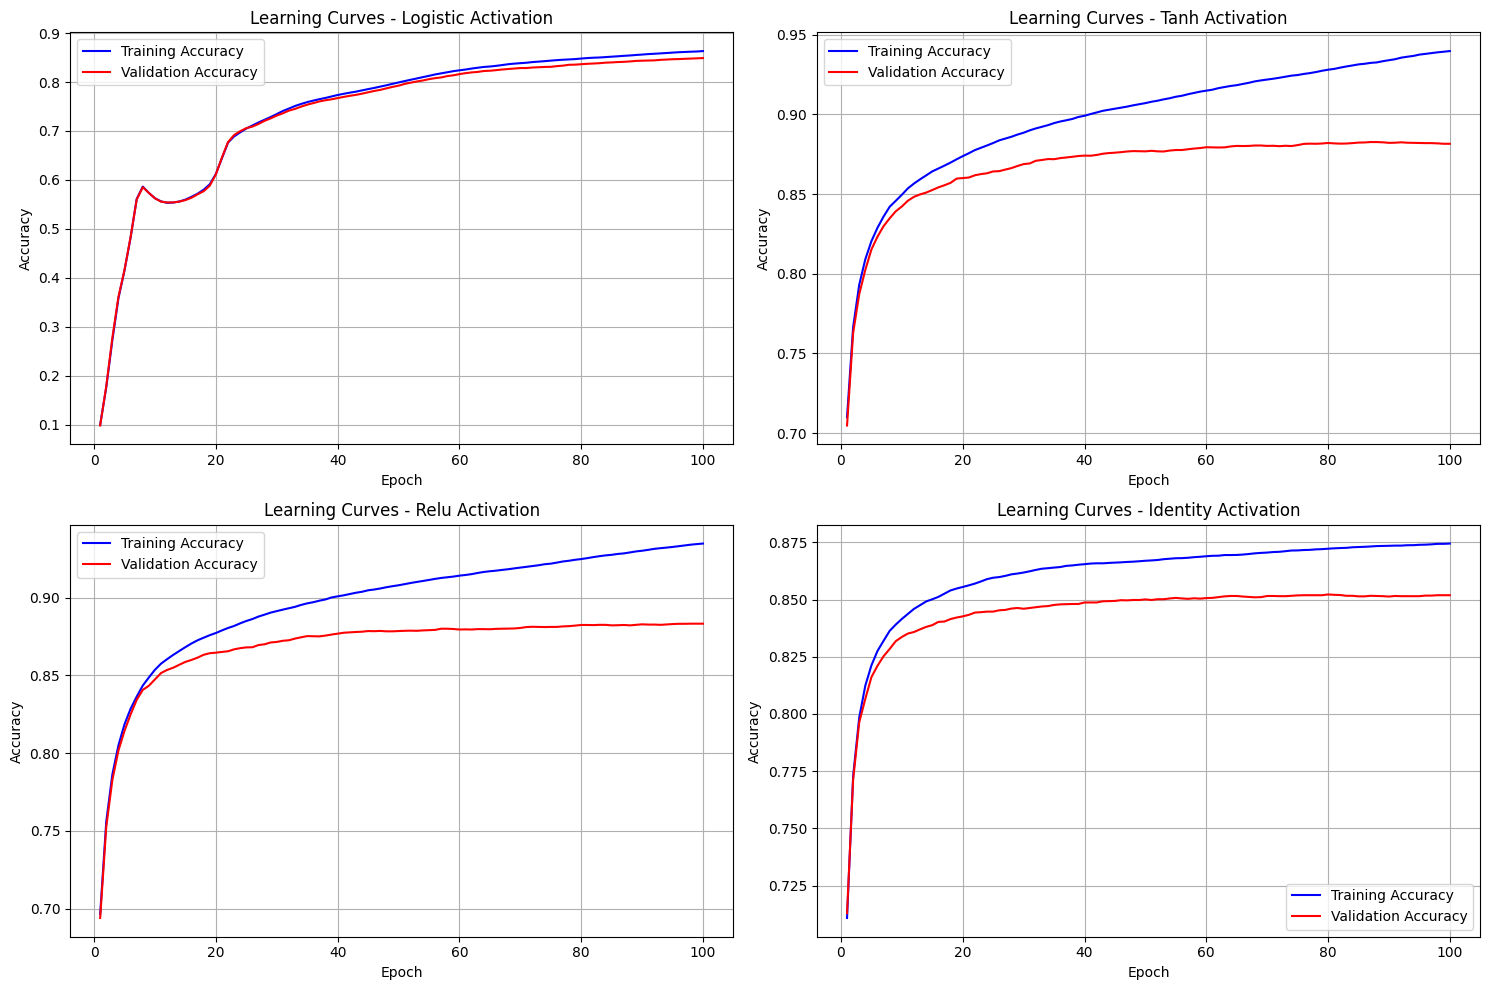

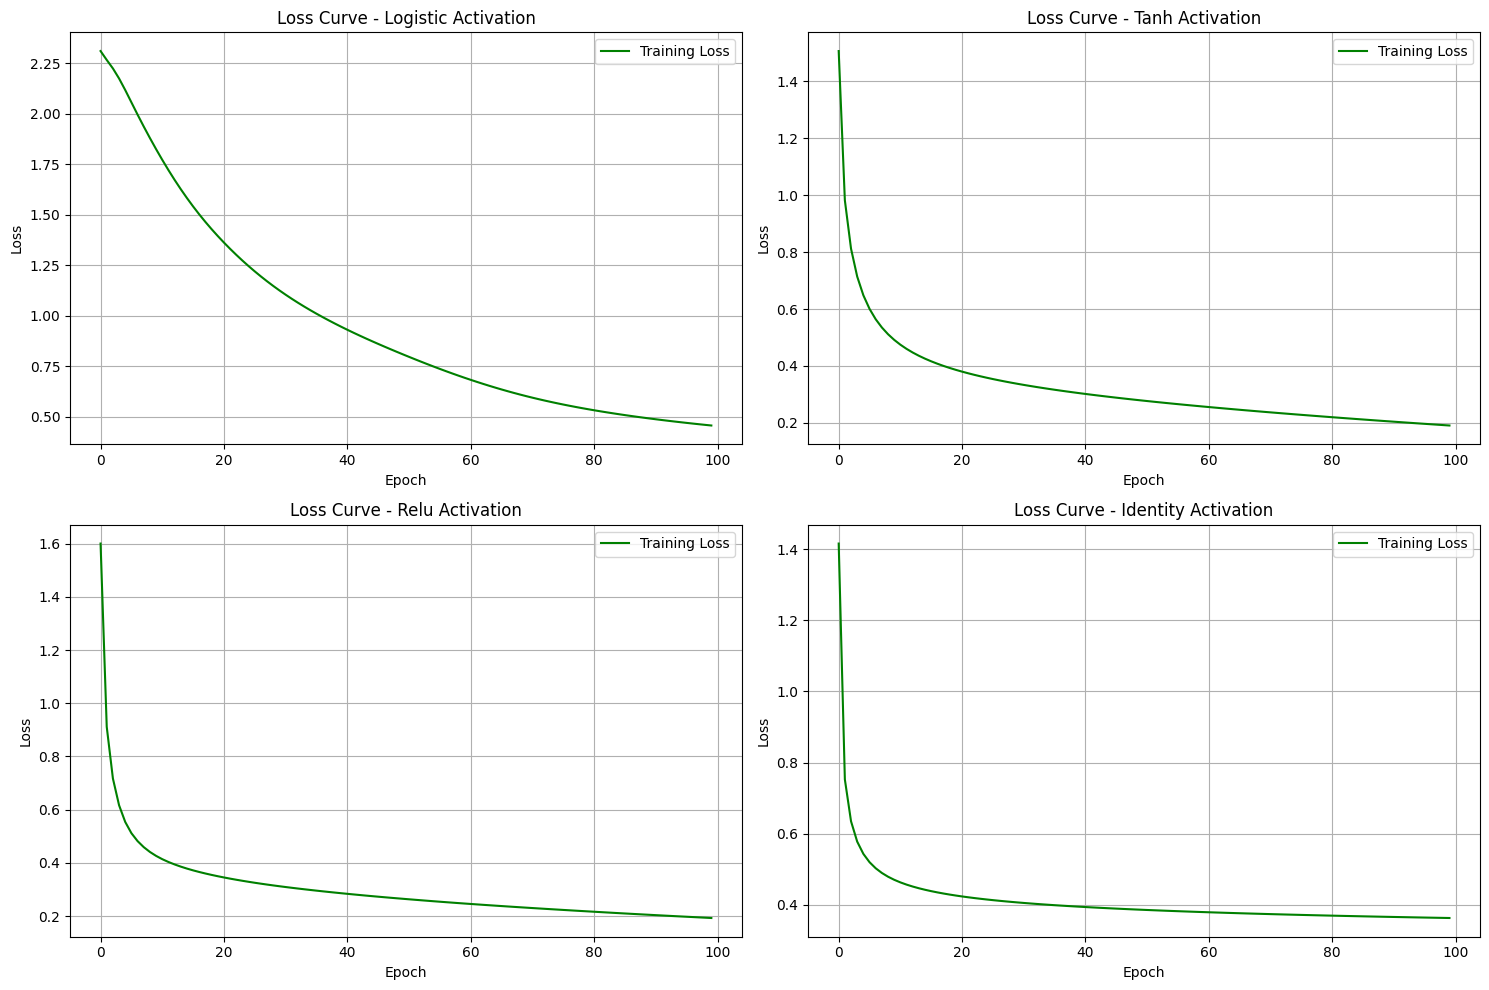


Performance Metrics:

Logistic Activation:
Test Set Accuracy: 0.8518
Final Validation Accuracy: 0.8488
Final Training Accuracy: 0.8632
--------------------------------------------------

Tanh Activation:
Test Set Accuracy: 0.8813
Final Validation Accuracy: 0.8815
Final Training Accuracy: 0.9396
--------------------------------------------------

Relu Activation:
Test Set Accuracy: 0.8847
Final Validation Accuracy: 0.8833
Final Training Accuracy: 0.9349
--------------------------------------------------

Identity Activation:
Test Set Accuracy: 0.8535
Final Validation Accuracy: 0.8519
Final Training Accuracy: 0.8745
--------------------------------------------------

Best performing activation function: relu
Test accuracy: 0.8847


In [7]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.base import BaseEstimator, ClassifierMixin

# Load data
train_df = pd.read_csv('/kaggle/input/fashion-mnsit/fashion-mnist_train.csv')
test_df = pd.read_csv('/kaggle/input/fashion-mnsit/fashion-mnist_test.csv')

# Separate features and labels
X_train = train_df.drop('label', axis=1)
y_train = train_df['label']
X_test = test_df.drop('label', axis=1)
y_test = test_df['label']

# Split training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Dictionary to store validation scores for each epoch
validation_scores = {}
train_scores = {}

# Initialize dictionary to store results
results = {}
activation_functions = ['logistic', 'tanh', 'relu', 'identity']

# Create figure for plotting
plt.figure(figsize=(15, 10))

# Function to calculate loss after each epoch
def batch_end_callback(model, X_train, y_train, X_val, y_val):
    train_score = model.score(X_train, y_train)
    val_score = model.score(X_val, y_val)
    return train_score, val_score

# Train models with different activation functions
for i, activation in enumerate(activation_functions):
    print(f"\nTraining with {activation} activation function...")
    
    # Initialize MLP
    mlp = MLPClassifier(
        hidden_layer_sizes=(128, 64, 32),
        activation=activation,
        solver='adam',
        batch_size=128,
        learning_rate_init=2e-5,
        max_iter=1,  # We'll manually iterate
        random_state=42
    )
    
    # Lists to store scores
    train_scores[activation] = []
    validation_scores[activation] = []
    loss_curves = []
    
    # Manual training loop for 100 epochs
    for epoch in range(100):
        mlp.partial_fit(X_train_scaled, y_train, classes=np.unique(y_train))
        
        # Calculate and store scores
        train_score = mlp.score(X_train_scaled, y_train)
        val_score = mlp.score(X_val_scaled, y_val)
        
        train_scores[activation].append(train_score)
        validation_scores[activation].append(val_score)
        loss_curves.append(mlp.loss_)
        
        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch + 1}/100 - Train Score: {train_score:.4f}, Val Score: {val_score:.4f}")
    
    # Store results
    results[activation] = {
        'model': mlp,
        'train_loss': loss_curves,
        'train_scores': train_scores[activation],
        'val_scores': validation_scores[activation],
        'val_score': mlp.score(X_val_scaled, y_val),
        'test_score': mlp.score(X_test_scaled, y_test)
    }
    
    # Plot training and validation curves
    plt.subplot(2, 2, i+1)
    epochs = range(1, 101)
    
    # Plot both training and validation accuracy
    plt.plot(epochs, train_scores[activation], 'b-', label='Training Accuracy')
    plt.plot(epochs, validation_scores[activation], 'r-', label='Validation Accuracy')
    
    plt.title(f'Learning Curves - {activation.capitalize()} Activation')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# Create a second figure for loss curves
plt.figure(figsize=(15, 10))
for i, activation in enumerate(activation_functions):
    plt.subplot(2, 2, i+1)
    plt.plot(results[activation]['train_loss'], 'g-', label='Training Loss')
    plt.title(f'Loss Curve - {activation.capitalize()} Activation')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# Print performance metrics
print("\nPerformance Metrics:")
for activation in activation_functions:
    print(f"\n{activation.capitalize()} Activation:")
    print(f"Test Set Accuracy: {results[activation]['test_score']:.4f}")
    print(f"Final Validation Accuracy: {results[activation]['val_score']:.4f}")
    print(f"Final Training Accuracy: {results[activation]['train_scores'][-1]:.4f}")
    print("-" * 50)

# Find best performing activation function
best_activation = max(results.items(), key=lambda x: x[1]['test_score'])[0]
print(f"\nBest performing activation function: {best_activation}")
print(f"Test accuracy: {results[best_activation]['test_score']:.4f}")

**PART C**

Fitting 3 folds for each of 9 candidates, totalling 27 fits

Training final model with best parameters on full dataset...
[CV] END batch_size=64, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.0001, solver=adam; total time= 1.0min
[CV] END batch_size=64, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.0005, solver=adam; total time=  27.4s
[CV] END batch_size=128, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.0001, solver=adam; total time=  35.1s
[CV] END batch_size=128, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.0005, solver=adam; total time=  19.7s
[CV] END batch_size=128, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.001, solver=adam; total time=  15.4s
[CV] END batch_size=256, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.0001, solver=adam; total time=  31.2s
[CV] END batch_size=256, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.001, solver=adam; total time=  19.0s
[CV] END batch_size=64, hidden_layer_sizes=(128, 64, 32)

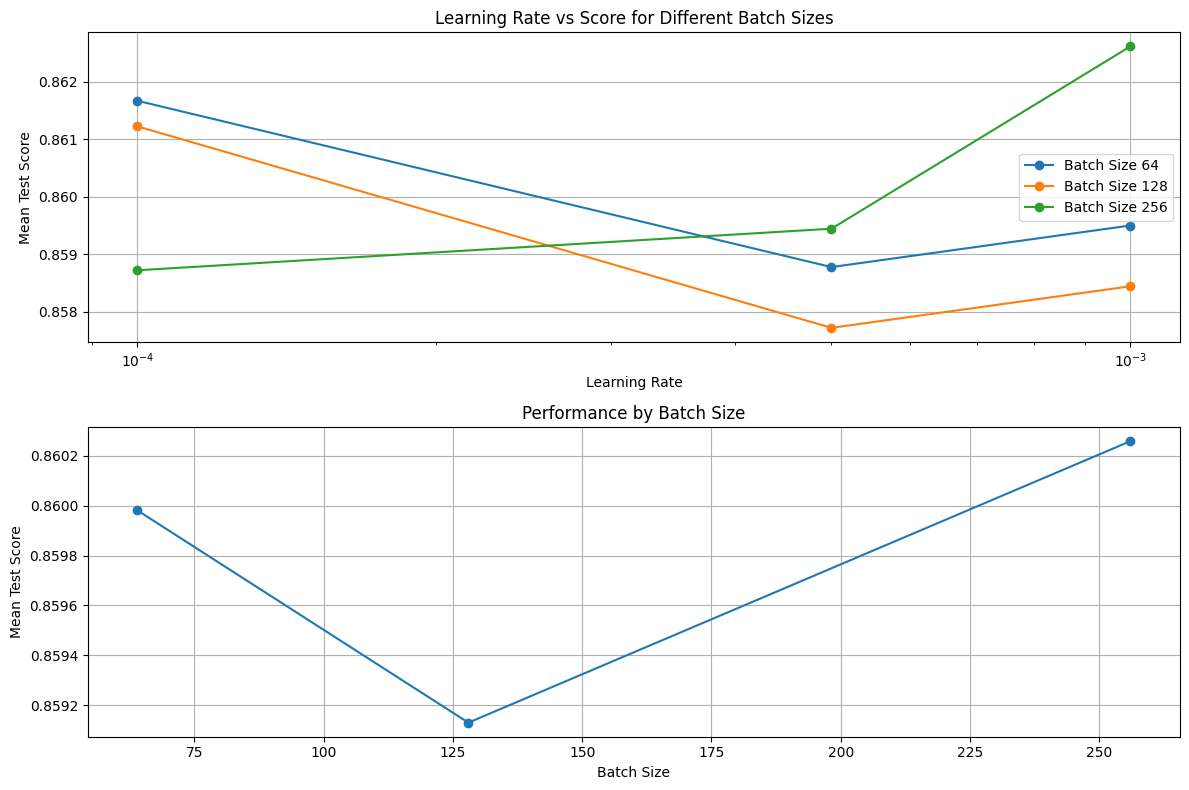

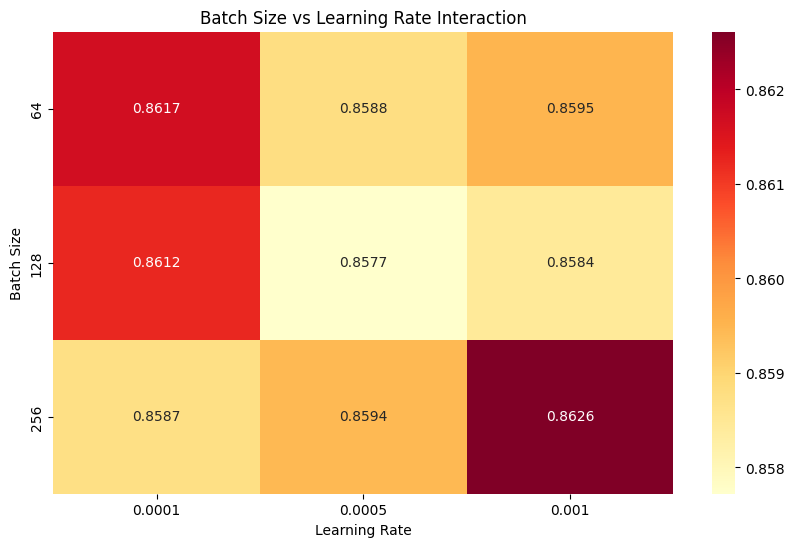

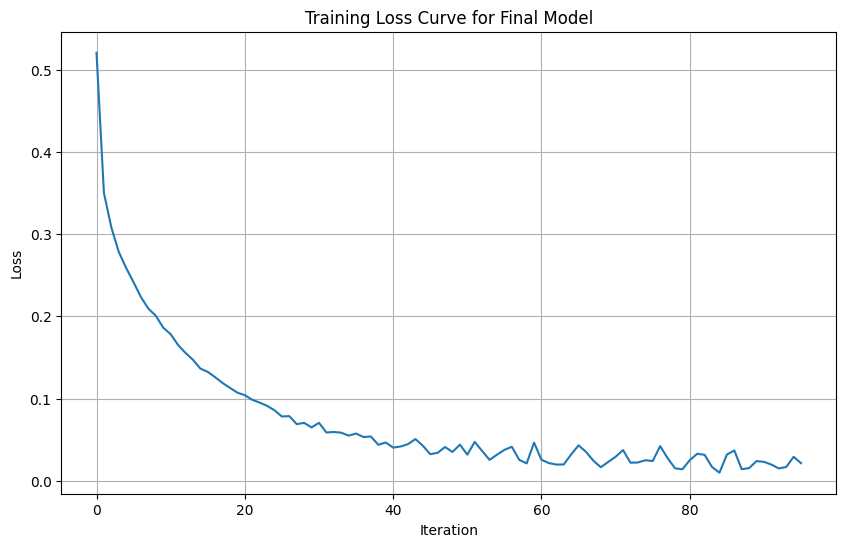


Best Configuration Summary:
architecture: (128, 64, 32)
solver: adam
batch_size: 256
learning_rate: 0.001
test_accuracy: 0.8885


In [8]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold

# Load data
train_df = pd.read_csv('/kaggle/input/fashion-mnsit/fashion-mnist_train.csv')
test_df = pd.read_csv('/kaggle/input/fashion-mnsit/fashion-mnist_test.csv')

# Separate features and labels
X_train = train_df.drop('label', axis=1)
y_train = train_df['label']
X_test = test_df.drop('label', axis=1)
y_test = test_df['label']

# Use a smaller subset for grid search
X_subset, _, y_subset, _ = train_test_split(X_train, y_train, train_size=0.3, random_state=42, stratify=y_train)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_subset)
X_test_scaled = scaler.transform(X_test)

# Define a more focused parameter grid
param_grid = {
    'hidden_layer_sizes': [(128, 64, 32)],  # Keep the best performing architecture
    'solver': ['adam'],  # Adam is generally the best performer
    'batch_size': [64, 128, 256],
    'learning_rate_init': [1e-4, 5e-4, 1e-3]  # Slightly higher learning rates
}

# Initialize the MLPClassifier with ReLU activation
mlp = MLPClassifier(
    activation='relu',
    random_state=42,
    max_iter=100,
    early_stopping=True,  # Add early stopping
    validation_fraction=0.1,
    n_iter_no_change=10
)

# Use StratifiedKFold for better fold distribution
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid,
    cv=cv,
    n_jobs=-1,
    verbose=2,
    scoring='accuracy'
)

# Fit the grid search
grid_search.fit(X_train_scaled, y_subset)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train final model on full dataset with best parameters
print("\nTraining final model with best parameters on full dataset...")
final_model = MLPClassifier(
    activation='relu',
    random_state=42,
    **best_params
)
final_model.fit(scaler.fit_transform(X_train), y_train)
test_score = final_model.score(X_test_scaled, y_test)

# Get the cross-validation results
cv_results = pd.DataFrame(grid_search.cv_results_)

# Print the results
print("\nGrid Search Results:")
print("===================")
print("\nBest Parameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")
print(f"\nBest Cross-Validation Score: {best_score:.4f}")
print(f"Test Set Score with Best Parameters: {test_score:.4f}")

# Visualizations
plt.figure(figsize=(12, 8))

# Plot 1: Learning Rate vs Mean Test Score for different batch sizes
plt.subplot(2, 1, 1)
for batch_size in param_grid['batch_size']:
    mask = cv_results['param_batch_size'] == batch_size
    plt.plot(
        cv_results[mask]['param_learning_rate_init'],
        cv_results[mask]['mean_test_score'],
        'o-',
        label=f'Batch Size {batch_size}'
    )
plt.xscale('log')
plt.xlabel('Learning Rate')
plt.ylabel('Mean Test Score')
plt.title('Learning Rate vs Score for Different Batch Sizes')
plt.legend()
plt.grid(True)

# Plot 2: Batch Size vs Mean Test Score
plt.subplot(2, 1, 2)
batch_scores = []
for batch_size in param_grid['batch_size']:
    mask = cv_results['param_batch_size'] == batch_size
    batch_scores.append(cv_results[mask]['mean_test_score'].mean())

plt.plot(param_grid['batch_size'], batch_scores, 'o-')
plt.xlabel('Batch Size')
plt.ylabel('Mean Test Score')
plt.title('Performance by Batch Size')
plt.grid(True)

plt.tight_layout()
plt.show()

# Create a heatmap of parameter interactions
plt.figure(figsize=(10, 6))
pivot_table = cv_results.pivot_table(
    values='mean_test_score',
    index='param_batch_size',
    columns='param_learning_rate_init'
)
sns.heatmap(pivot_table, annot=True, fmt='.4f', cmap='YlOrRd')
plt.title('Batch Size vs Learning Rate Interaction')
plt.xlabel('Learning Rate')
plt.ylabel('Batch Size')
plt.show()

# Plot loss curve for final model
plt.figure(figsize=(10, 6))
plt.plot(final_model.loss_curve_)
plt.title('Training Loss Curve for Final Model')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# Save best parameters to reuse
best_params_dict = {
    'architecture': str(best_params['hidden_layer_sizes']),
    'solver': best_params['solver'],
    'batch_size': best_params['batch_size'],
    'learning_rate': best_params['learning_rate_init'],
    'test_accuracy': test_score
}

print("\nBest Configuration Summary:")
for key, value in best_params_dict.items():
    print(f"{key}: {value}")

**PART D**


Training model with relu activation...
Epoch 10/100
Training Loss: 0.023035
Validation Loss: 0.022853
Epoch 20/100
Training Loss: 0.017792
Validation Loss: 0.017672
Epoch 30/100
Training Loss: 0.015301
Validation Loss: 0.015230
Epoch 40/100
Training Loss: 0.013896
Validation Loss: 0.013848
Epoch 50/100
Training Loss: 0.012956
Validation Loss: 0.012920
Epoch 60/100
Training Loss: 0.012239
Validation Loss: 0.012210
Epoch 70/100
Training Loss: 0.011684
Validation Loss: 0.011660
Epoch 80/100
Training Loss: 0.011238
Validation Loss: 0.011218
Epoch 90/100
Training Loss: 0.010853
Validation Loss: 0.010838
Epoch 100/100
Training Loss: 0.010516
Validation Loss: 0.010506

Training model with identity activation...
Epoch 10/100
Training Loss: 0.021842
Validation Loss: 0.021673
Epoch 20/100
Training Loss: 0.014790
Validation Loss: 0.014715
Epoch 30/100
Training Loss: 0.011787
Validation Loss: 0.011744
Epoch 40/100
Training Loss: 0.010234
Validation Loss: 0.010207
Epoch 50/100
Training Loss: 0.009

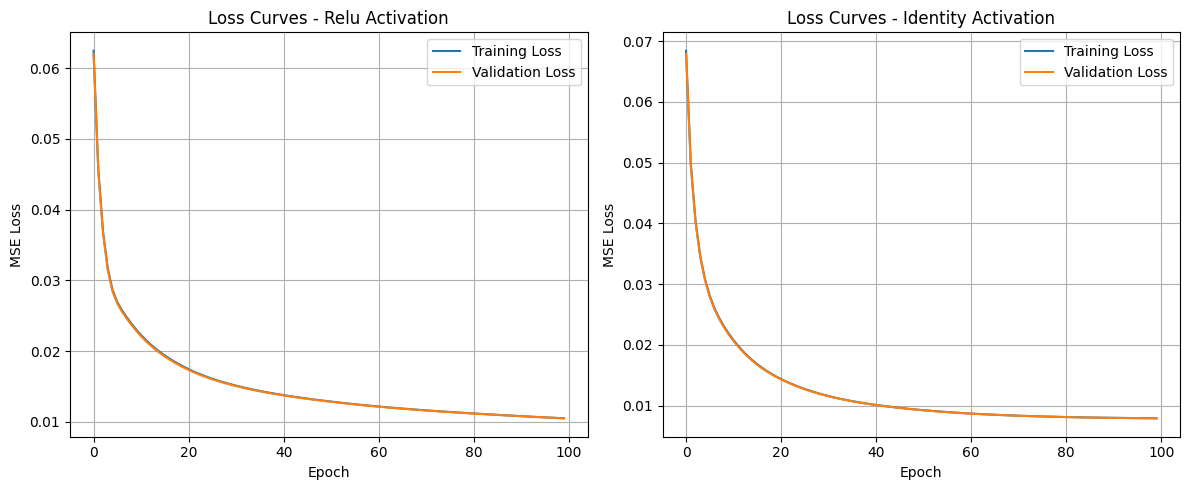

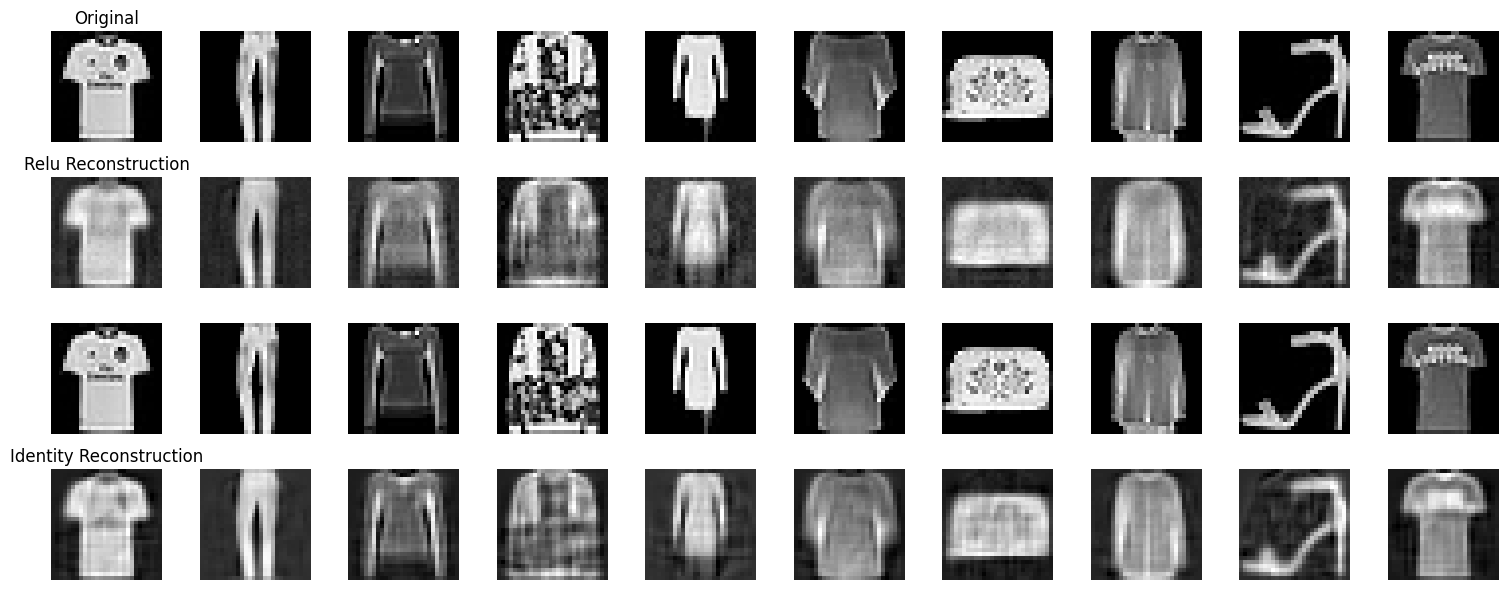


Final Losses:

Relu Activation:
Training Loss: 0.010516
Validation Loss: 0.010506

Identity Activation:
Training Loss: 0.007924
Validation Loss: 0.007916


In [9]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load and prepare data more efficiently
def prepare_data(train_path, test_path):
    # Load only a subset of data for faster training
    train_df = pd.read_csv(train_path)
    test_df = pd.read_csv(test_path)
    
    # Prepare features
    X_train = train_df.drop('label', axis=1).values / 255.0  # Normalize here
    X_test = test_df.drop('label', axis=1).values / 255.0
    
    # Split training data
    X_train, X_val = train_test_split(X_train, test_size=0.2, random_state=42)
    
    return X_train, X_val, X_test

# Train model with early stopping
def train_model(X_train, X_val, activation, hidden_layer_sizes, max_epochs=100):
    model = MLPRegressor(
        hidden_layer_sizes=hidden_layer_sizes,
        activation=activation,
        solver='adam',
        learning_rate_init=2e-5,
        max_iter=1,
        random_state=42,
        verbose=False
    )
    
    train_losses = []
    val_losses = []
    best_val_loss = float('inf')
    patience = 5
    patience_counter = 0
    
    for epoch in range(max_epochs):
        # Train for one epoch
        model.partial_fit(X_train, X_train)
        
        # Calculate losses
        train_pred = model.predict(X_train)
        val_pred = model.predict(X_val)
        
        train_loss = np.mean((X_train - train_pred) ** 2)
        val_loss = np.mean((X_val - val_pred) ** 2)
        
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        
        # Early stopping check
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
        else:
            patience_counter += 1
            
        if patience_counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break
            
        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch + 1}/{max_epochs}")
            print(f"Training Loss: {train_loss:.6f}")
            print(f"Validation Loss: {val_loss:.6f}")
    
    return model, train_losses, val_losses

# Main execution
def main():
    # 1. Prepare data
    X_train, X_val, X_test = prepare_data(
        '/kaggle/input/fashion-mnsit/fashion-mnist_train.csv',
        '/kaggle/input/fashion-mnsit/fashion-mnist_test.csv'
    )
    
    # 2. Define network architecture
    c, b, a = 392, 196, 98  # Following c > b > a format for 5 layers
    hidden_layer_sizes = (c, b, a, b, c)
    
    # 3. Train models
    results = {}
    for activation in ['relu', 'identity']:
        print(f"\nTraining model with {activation} activation...")
        model, train_losses, val_losses = train_model(
            X_train, X_val, activation, hidden_layer_sizes
        )
        results[activation] = {
            'model': model,
            'train_losses': train_losses,
            'val_losses': val_losses
        }
    
    # 4. Plot losses
    plt.figure(figsize=(12, 5))
    for i, activation in enumerate(['relu', 'identity']):
        plt.subplot(1, 2, i+1)
        plt.plot(results[activation]['train_losses'], label='Training Loss')
        plt.plot(results[activation]['val_losses'], label='Validation Loss')
        plt.title(f'Loss Curves - {activation.capitalize()} Activation')
        plt.xlabel('Epoch')
        plt.ylabel('MSE Loss')
        plt.legend()
        plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # 5. Visualize reconstructions
    n_samples = 10
    plt.figure(figsize=(15, 6))
    
    for i, activation in enumerate(['relu', 'identity']):
        model = results[activation]['model']
        reconstructions = model.predict(X_test[:n_samples])
        
        for j in range(n_samples):
            # Original images
            plt.subplot(4, n_samples, j + 1 + (i * 2 * n_samples))
            plt.imshow(X_test[j].reshape(28, 28), cmap='gray')
            if j == 0:
                plt.title(f'Original' if i == 0 else '')
            plt.axis('off')
            
            # Reconstructed images
            plt.subplot(4, n_samples, j + 1 + ((i * 2 + 1) * n_samples))
            plt.imshow(reconstructions[j].reshape(28, 28), cmap='gray')
            if j == 0:
                plt.title(f'{activation.capitalize()} Reconstruction')
            plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # 6. Print final losses
    print("\nFinal Losses:")
    for activation in ['relu', 'identity']:
        print(f"\n{activation.capitalize()} Activation:")
        print(f"Training Loss: {results[activation]['train_losses'][-1]:.6f}")
        print(f"Validation Loss: {results[activation]['val_losses'][-1]:.6f}")

if __name__ == "__main__":
    main()

**PART E**

In [2]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load data
print("Loading data...")
train_df = pd.read_csv('/kaggle/input/fashion-mnsit/fashion-mnist_train.csv')
test_df = pd.read_csv('/kaggle/input/fashion-mnsit/fashion-mnist_test.csv')

# Prepare features and labels
X_train = train_df.drop('label', axis=1).values / 255.0
y_train = train_df['label'].values
X_test = test_df.drop('label', axis=1).values / 255.0
y_test = test_df['label'].values

# Architecture parameters
c, b, a = 392, 196, 98
hidden_layer_sizes = (c, b, a, b, c)

# Dictionary to store results
results = {}

# Train autoencoders and extract features for both activation functions
for activation in ['relu', 'identity']:
    print(f"\nTraining autoencoder with {activation} activation...")
    
    # Create and train autoencoder
    autoencoder = MLPRegressor(
        hidden_layer_sizes=hidden_layer_sizes,
        activation=activation,
        solver='adam',
        learning_rate_init=2e-5,
        max_iter=50,  # Reduced for initial testing
        random_state=42
    )
    
    # Train autoencoder
    autoencoder.fit(X_train, X_train)
    
    # Extract features from middle layer (size 'a')
    # Get the coef_ matrices and intercepts for the first three layers
    W1, W2, W3 = autoencoder.coefs_[:3]
    b1, b2, b3 = autoencoder.intercepts_[:3]
    
    # Function to apply activation
    def apply_activation(x, activation_type):
        if activation_type == 'relu':
            return np.maximum(0, x)
        return x  # identity activation
    
    # Extract features by forward propagating to the middle layer
    def get_features(X):
        layer1 = apply_activation(np.dot(X, W1) + b1, activation)
        layer2 = apply_activation(np.dot(layer1, W2) + b2, activation)
        layer3 = apply_activation(np.dot(layer2, W3) + b3, activation)
        return layer3
    
    # Get features for train and test sets
    train_features = get_features(X_train)
    test_features = get_features(X_test)
    
    print(f"Training classifier on {activation} features...")
    
    # Create and train classifier
    classifier = MLPClassifier(
        hidden_layer_sizes=(a, a),  # 2 layers of size 'a'
        max_iter=200,
        solver='adam',
        learning_rate_init=2e-5,
        random_state=42
    )
    
    # Train classifier
    classifier.fit(train_features, y_train)
    
    # Make predictions
    train_pred = classifier.predict(train_features)
    test_pred = classifier.predict(test_features)
    
    # Calculate and store metrics
    results[activation] = {
        'train_accuracy': accuracy_score(y_train, train_pred),
        'test_accuracy': accuracy_score(y_test, test_pred),
        'test_report': classification_report(y_test, test_pred)
    }

# Print results
print("\nClassification Results:")
for activation in ['relu', 'identity']:
    print(f"\n{activation.capitalize()} Feature Classifier:")
    print(f"Training Accuracy: {results[activation]['train_accuracy']:.4f}")
    print(f"Testing Accuracy: {results[activation]['test_accuracy']:.4f}")
    print("\nDetailed Classification Report:")
    print(results[activation]['test_report'])

Loading data...

Training autoencoder with relu activation...
Training classifier on relu features...


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Training autoencoder with identity activation...
Training classifier on identity features...


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Classification Results:

Relu Feature Classifier:
Training Accuracy: 0.8536
Testing Accuracy: 0.8520

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.80      1000
           1       0.98      0.97      0.97      1000
           2       0.76      0.78      0.77      1000
           3       0.85      0.89      0.87      1000
           4       0.78      0.78      0.78      1000
           5       0.93      0.91      0.92      1000
           6       0.67      0.60      0.63      1000
           7       0.88      0.90      0.89      1000
           8       0.94      0.95      0.95      1000
           9       0.92      0.93      0.92      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000


Identity Feature Classifier:
Training Accuracy: 0.8833
Testing Accuracy: 0.8767

Detailed Classification 